In [73]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

In [74]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [75]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [76]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [77]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [78]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2214 - accuracy: 0.9346 - val_loss: 0.0789 - val_accuracy: 0.9780
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0807 - accuracy: 0.9748 - val_loss: 0.0505 - val_accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0547 - accuracy: 0.9837 - val_loss: 0.0399 - val_accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0292 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0222 - val_accuracy: 0.9940


In [79]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0440 - accuracy: 0.9862


[0.043957121670246124, 0.9861999750137329]

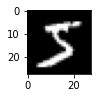

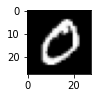

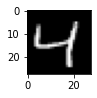

In [80]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [81]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model/assets
['saved_model.pb', 'variables', 'keras_metadata.pb', 'assets']


In [82]:
lenet_5_model.save("my.h5")

In [83]:
lenet_5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [84]:
json_model = lenet_5_model.to_json()

In [85]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [86]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [87]:
w0=lenet_5_model.layers[0].get_weights()[0]
test=np.reshape(w0,(6,5,5))
f = open("k1.h", "w")
for i in range(6):
    for j in range(5):
        for k in range(5):
            f.write(f"{test[i,j,k]}\n")
f.close()



In [88]:
w1=lenet_5_model.layers[2].get_weights()[0]
#print(w1.shape)
w1=np.reshape(w1,(16,6,5,5))
print(w1.shape)
f = open("k2.h", "w")
for i in range(16):
    for l in range(6):
        for j in range(5):
            for k in range(5):
                f.write(f"{w1[i,l,j,k]}\n")
f.close()


(96, 5, 5)


In [89]:
w2=lenet_5_model.layers[5].get_weights()[0]
f = open("w1.h", "w")
for i in range(400):
    for j in range(120):
        f.write(f"{w2[i,j]}\n")
f.close()

In [90]:
w3=lenet_5_model.layers[6].get_weights()[0]
f = open("w2.h", "w")
for i in range(120):
    for j in range(84):
        f.write(f"{w3[i,j]}\n")
f.close()

In [91]:
w4=lenet_5_model.layers[7].get_weights()[0]
f = open("w3.h", "w")
for i in range(84):
    for j in range(10):
        f.write(f"{w4[i,j]}\n")
f.close()